In [5]:
!conda install --yes --quiet fastai
!conda install --yes --quiet duckduckgo_search


Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
 - fastchan
 - pytorch
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /home/anantsri22/miniconda3

  added / updated specs:
    - fastai


The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge/noarch::certifi-2024.6.2-~ --> pkgs/main/linux-64::certifi-2024.6.2-py312h06a4308_0 


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Channels:
 - defaults
 - conda-forge
 - fastchan
 - pytorch
Platform: linux-64
Solving environment: ...working... failed

PackagesNotFoundError: The following packages are not available from current channels:

  - duckduckgo_search

Current channels:

  - defaults
  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/fastchan/noarch
  - https://conda.anaconda.org/conda-forge/no

In [6]:
!pip3 install -q duckduckgo_search

In [7]:
from duckduckgo_search import DDGS
from fastcore.all import *

ddgs = DDGS()
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddgs.images(term, max_results=max_images)).itemgot('image')

In [8]:
urls = search_images('bird_photos' , 2)
urls[0]

Searching for 'bird_photos'


'https://images.pexels.com/photos/1661179/pexels-photo-1661179.jpeg?cs=srgb&dl=green-bird-1661179.jpg&fm=jpg'

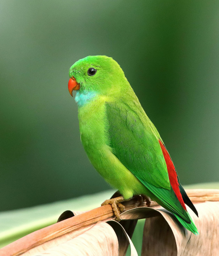

In [9]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)
from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256 ,256)

In [10]:
urlsf = search_images('forest_photos' , 2)
urlsf[0]

Searching for 'forest_photos'


'http://www.pixelstalk.net/wp-content/uploads/2016/10/Pine-Forest-Wallpaper-High-Quality-HD.jpg'

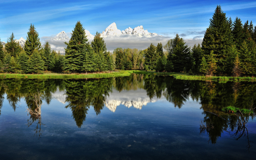

In [11]:
forest = 'forest.jpg'
download_url(urlsf[0] , forest , show_progress = True)
im1 = Image.open(forest)
im1 = im1.to_thumb(256 ,256)
im1

In [12]:
from pathlib import Path 
bird_or_not = 'data/images'
searches = ['forest','bird']
path = Path('bird_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'bird photo'
Searching for 'bird sun photo'
Searching for 'bird shade photo'


In [13]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

3

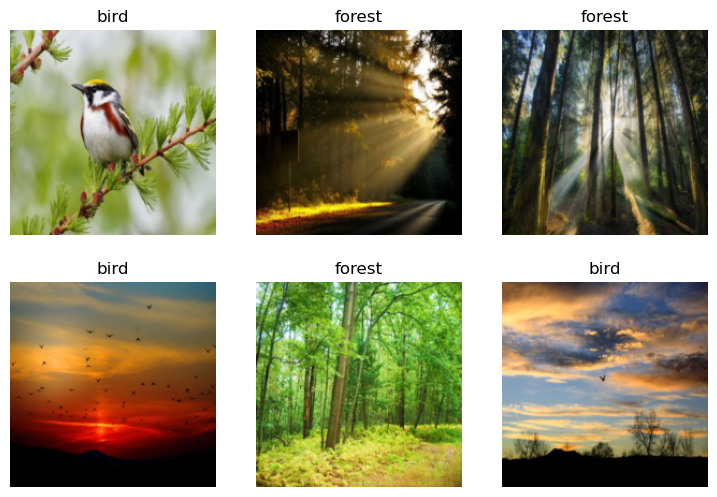

In [14]:
dls = DataBlock(
    blocks = (ImageBlock , CategoryBlock) ,
    get_items = get_image_files , 
    splitter = RandomSplitter(valid_pct = 0.2 , seed = 42),
    get_y = parent_label,
    item_tfms = [Resize(192 , method= 'squish')]
).dataloaders(path , bs= 32)
dls.show_batch(max_n = 6 )

In [15]:
learn = vision_learner(dls , resnet18 , metrics = error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/anantsri22/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:04<00:00, 10.1MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.782878,0.218760,0.090909,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.098474,0.020901,0.000000,00:10
1,0.064331,0.017153,0.000000,00:10
2,0.043589,0.017977,0.000000,00:10


In [17]:
is_bird , _ , probs = learn.predict(PILImage.create('forest.jpg'))
print(f'this is a {is_bird}')
print(f'probability its a bird = {probs[0] : .4f}')

this is a forest
probability its a bird =  0.1441
